# Given 
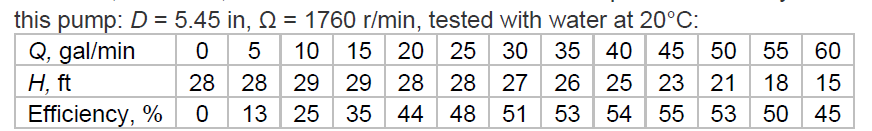
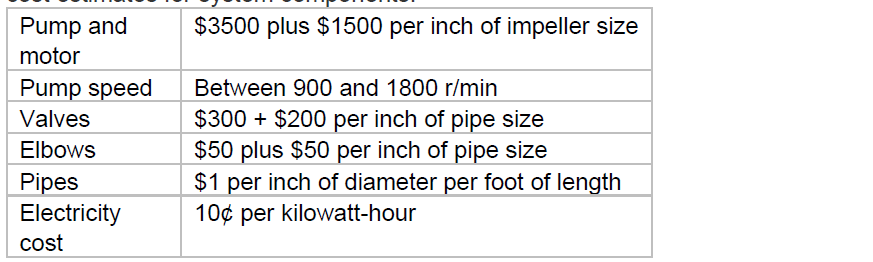

L = 0.8 mile,
h = 150 ft,
Q_day = 1.5e6 gallos/day,
time < 8 h, 
4 butterfly, 
10 elbows,
iron pip

# Find
pipe size ($d_p$), pump impeller size ($D$), pump speed ($\Omega$)

In [2]:
import sympy as sp # use symbolic python taking derivative
import handcalcs.render # render
from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)
import numpy as np

In [22]:
%%render para
Vol = 1.5e6*u.gallons #  per day
t = 8*u.h # hours
Q_d = Vol/t #gallons/min
L = 0.8*u.mile # length
h = 150*u.ft

<IPython.core.display.Latex object>

Text(0.5, 1.0, 'dimensionless')

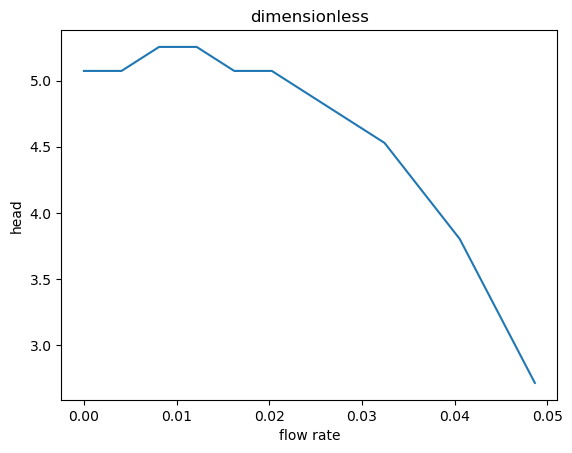

In [34]:
import matplotlib.pyplot as plt

Q = np.array([0,5,10,15,20,25,30,35,40,45,50,55,60])*u.gallons/u.min
H = np.array([28,28,29,29,28,28,27,26,25,23,21,18,15])*u.ft
eta = np.array([0,13,25,35,44,48,51,53,54,55,53,50,45])
D = 5.45*u.inch
g = 9.8*u.m/u.s**2
Omega = 1760/u.min
pi_Q = Q/Omega/D**3
pi_pre = g*H/Omega**2/D**2

#fig, ax = plt.subplots()
plt.plot(pi_Q, pi_pre)
plt.xlabel('flow rate')
plt.ylabel('head')
plt.title('dimensionless')

In [18]:
print(f'the volume flow rate is {Q_d.to(u.gallons/u.min)}')

the volume flow rate is 3125.0 gallon / minute


1. that flow rate 𝑄=3125 gallons/mins is very big compared with the pump data given, what should we do?

2. how to determine the headloss? 
$$\dfrac{P_1}{\rho g}+\dfrac{V_1^2}{2g}+z_1 + h_{p} = \dfrac{P_2}{\rho g}+\dfrac{V_2^2}{2g}+z_2 + h_L $$
$$ h_p = \dfrac{P_2}{\rho g}+\dfrac{V_2^2}{2g}+z_2 + h_L - (\dfrac{P_1}{\rho g}+\dfrac{V_1^2}{2g}+z_1 )$$

if we assume $P_1=P_2=P_{atm}$, same pipe size, $V_1=V_2$, then we have
$$h_p = z_2-z_1+h_L$$